## Distribution of editing efficiency

### PRIDICT

The dataset of pridict-1 has 90k examples, the example suggests using a zero inflated poisson or gaussian distribution

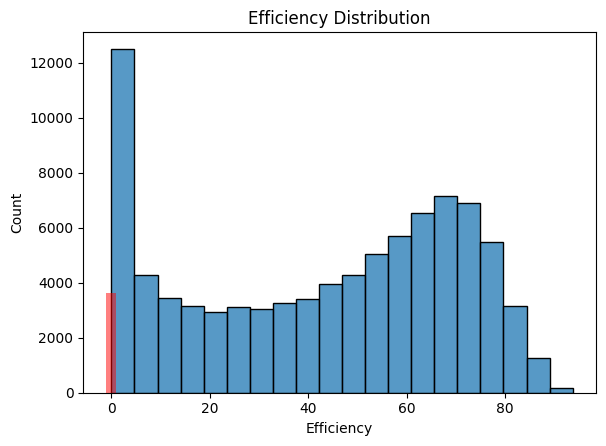

In [1]:
from os.path import join as pjoin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
path = pjoin('data', 'pridict-90k.csv')
df = pd.read_csv(path)

efficiency_col = 'averageedited'
df = df[df[efficiency_col].notnull()]


# list out zero efficiency as a separate group
zero_efficiency = df[df[efficiency_col] == 0]
non_zero_efficiency = df[df[efficiency_col] > 0]

# plot the distribution of efficiency
fig, ax = plt.subplots()
sns.histplot(non_zero_efficiency[efficiency_col], bins=20, ax=ax)
ax.set_xlabel('Efficiency')
ax.set_ylabel('Count')
ax.set_title('Efficiency Distribution')

# true zero is a separate bar
ax.bar(0, len(zero_efficiency), color='red', alpha=0.5, width=2)

# increase font size everywhere
plt.rcParams.update({'font.size': 18})

# tight layout
plt.tight_layout()

# save the figure
fig.savefig(pjoin('txt', 'figures', 'efficiency_distribution.png'))

In [ ]:
# correlation between deepcas9 score and predicted efficiency
from scipy.stats import pearsonr, spearmanr
import numpy as np

# Load the data
path = pjoin('data', 'pridict-90k.csv')
df = pd.read_csv(path)

spcas9 = df['deepcas9'].values
efficiency = df['averageedited'].values

print(np.corrcoef(spcas9, efficiency))

In [ ]:
# acquire a subset of the pridict 90k dataset
from os.path import join as pjoin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
path = pjoin('data', 'pridict-90k.csv')
df = pd.read_csv(path)

efficiency_col = 'averageedited'
df = df[df[efficiency_col].notnull()]

# rename name column to HGVS
df.rename(columns={'Name': 'HGVS'}, inplace=True)

# get 1000 random samples and save a pridict-90k-small.csv
df.sample(1000).to_csv(pjoin('data', 'pridict-90k-small.csv'), index=False)

# Data Parsing

## Full pipeline

In [3]:
from dataset import convert_pridict_to_crispai
from os.path import join as pjoin
import pandas as pd

# load the small dataset
path = pjoin('data', 'pridict-90k-small.csv')
og_data = pd.read_csv(path)

data = convert_pridict_to_crispai(og_data)

# locate the sgRNA in the context sequence
sgRNA_positions = [context.find(sgRNA) for sgRNA, context in zip(data['sgRNA_sequence'], data['context sequence flank_73'])]

print(sgRNA_positions)

# remove data where sgRNA is not at position 73 in the context sequence
print(f"{len(data)} before filtering")
data = data[[pos == 73 for pos in sgRNA_positions]]
print(f"{len(data)} after filtering")

# save to the data folder
data.to_csv(pjoin('data', 'crispai-90k-small.csv'), index=False)

Some genebe annotations are missing
[72, 72, 72, 72, 69, 71, 72, 69, 69, 71, 72, 70, 70, 70, 71, 72, 69, 73, 70, 71, 72, 72, 72, 72, 69, 71, 72, 69, 71, 72, 71, 72, 69, 69, 72, 69, 72, 72, 71, 69, 72, 70, 70, 72, 69, 72, 70, 72, 69, 72, 69, 69, 71, 72, 72, 69, 70, 68, 72, 72, 72, 69, 69, 72, 72, 70, 70, 69, 72, 69, 72, 72, 72, 72, 70, 71, 69, 69, 72, 70, 72, 72, 69, 72, 69, 69, 69, 72, 69, 69, 74, 69, 70, 70, 72, 72, 69, 69, 74, 70, 70, 69, 72, 69, 69, 69, 69, 72, 69, 69, 69, 72, 71, 71, 69, 69, 70, 78, 71, 74, 72, 70, 71, 69, 69, 71, 69, 72, 72, 70, 72, 69, 69, 70, 69, 69, 71, 72, 69, 71, 69, -1, 69, 71, 72, 71, 72, 69, 72, 69, 72, 72, 72, 73, 66, 72, 72, 71, 72, 69, 69, 72, 71, 72, 69, 72, 72, 70, 72, 71, 69, 72, 71, 72, 71, 72, 69, 72, 71, 69, 72, 71, 69, 69, 71, 70, 69, 69, 71, 72, 71, 72, 69, 69, 70, 70, 72, 72, 71, 72, 69, 71, 71, 70, 69, 71, 69, -1, 71, 69, 71, 69, 70, 69, 72, 69, 70, 69, 69, 71, 72, 70, 69, 70, 70, 71, 69, 72, 72, 70, 73, 71, 69, 72, 71, 72, 72, 69, 69, 72, 72,

In [5]:
# execute for the full dataset
from dataset import convert_pridict_to_crispai
from os.path import join as pjoin
import pandas as pd

# load the small dataset
path = pjoin('data', 'pridict-90k.csv')
data = pd.read_csv(path)

data = convert_pridict_to_crispai(data, model='long')

# locate the sgRNA in the context sequence
sgRNA_positions = [context.find(sgRNA) for sgRNA, context in zip(data['sgRNA_sequence'], data['context sequence flank_73'])]

print(sgRNA_positions)

# remove data where sgRNA is not at position 73 in the context sequence
print(f"{len(data)} before filtering")
data = data[[pos == 73 for pos in sgRNA_positions]]
print(f"{len(data)} after filtering")

# save to the data folder
data.to_csv(pjoin('data', 'crispai-90k-long.csv'), index=False)

Some genebe annotations are missing
[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 69, 69, 69, 69, 72, 72, 72, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 72, 72, 72, 72, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 72, 72, 72, 72, 69, 69, 69, 69, 70, 70, 70, 70, 72, 72, 72, 72, 72, 72, 72, 72, 69, 69, 69, 69, 69, 69, 72, 72, 72, 72, 69, 69, 72, 72, 72, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 72, 72, 69, 69, 69, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 69, 69, 69, 69, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 71, 71, 71, 71, 71, 71, 71, 71, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 69, 69, 69, 69, 69, 72, 72, 72, 72, 72, 72, 72, 71, 71, 71, 71, 71, 71, 71, 69, 69, 69, 69, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 69, 69, 69, 69, 72, 72, 72, 72,

In [6]:
# execute for the full dataset
from dataset import convert_pridict_to_crispai
from os.path import join as pjoin
import pandas as pd

# load the small dataset
path = pjoin('data', 'pridict-90k.csv')
data = pd.read_csv(path)

data = convert_pridict_to_crispai(data, model='base')

# locate the sgRNA in the context sequence
sgRNA_positions = [context.find(sgRNA) for sgRNA, context in zip(data['sgRNA_sequence'], data['context sequence flank_73'])]

print(sgRNA_positions)

# remove data where sgRNA is not at position 73 in the context sequence
print(f"{len(data)} before filtering")
data = data[[pos == 73 for pos in sgRNA_positions]]
print(f"{len(data)} after filtering")

# save to the data folder
data.to_csv(pjoin('data', 'crispai-90k.csv'), index=False)

Some genebe annotations are missing
[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 69, 69, 69, 69, 72, 72, 72, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 72, 72, 72, 72, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 72, 72, 72, 72, 69, 69, 69, 69, 70, 70, 70, 70, 72, 72, 72, 72, 72, 72, 72, 72, 69, 69, 69, 69, 69, 69, 72, 72, 72, 72, 69, 69, 72, 72, 72, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 72, 72, 69, 69, 69, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 69, 69, 69, 69, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 71, 71, 71, 71, 71, 71, 71, 71, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 69, 69, 69, 69, 69, 72, 72, 72, 72, 72, 72, 72, 71, 71, 71, 71, 71, 71, 71, 69, 69, 69, 69, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 69, 69, 69, 69, 72, 72, 72, 72,